# Классификация одобрения кредитов

## Описание задачи

Задача заключается в том, чтобы на основе определённых сведений о человеке спрогнозировать, получит ли он кредит или нет.

Для решения этой задачи существует набор данных, включающий 45 000 записей. Каждая из них описывает человека, претендующего на кредит, по 14 параметрам:

* Возраст
* Пол
* Образование
* Годовой доход
* Опыт работы
* Наличие собственного жилья
* Запрашиваемая сумма кредита
* Цели кредита
* Процентная ставка по кредиту
* Размер кредита в процентах от годового дохода
* Продолжительность кредитной истории
* Кредитный рейтинг
* Индикатор предыдущих дефолтов по кредитам
* Одобрение кредита

## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/un1i/machine-learning-2024/refs/heads/master/loan_data.csv'
data = pd.read_csv(url, sep=',',  engine='python')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Анализ данных

**Убедимся, что в данных нет пропущенных значений**

In [4]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


**Заменим тип `object` на `categorty`**

In [5]:
data['person_gender'] = data['person_gender'].astype('category')
data['person_education'] = data['person_education'].astype('category')
data['person_home_ownership'] = data['person_home_ownership'].astype('category')
data['loan_intent'] = data['loan_intent'].astype('category')
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].astype('category')

**Информация о категориальных признаках**

In [6]:
data.describe(include=['category'])

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [7]:
data['person_gender'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [8]:
data['person_education'].dtype

CategoricalDtype(categories=['Associate', 'Bachelor', 'Doctorate', 'High School',
                  'Master'],
, ordered=False, categories_dtype=object)

In [9]:
data['person_home_ownership'].dtype

CategoricalDtype(categories=['MORTGAGE', 'OTHER', 'OWN', 'RENT'], ordered=False, categories_dtype=object)

In [10]:
data['loan_intent'].dtype

CategoricalDtype(categories=['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
                  'MEDICAL', 'PERSONAL', 'VENTURE'],
, ordered=False, categories_dtype=object)

In [11]:
data['previous_loan_defaults_on_file'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

**Информация о числовых признаках**

In [12]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Подобронее посмотрим на параметры `person_age` и `person_incomme`**

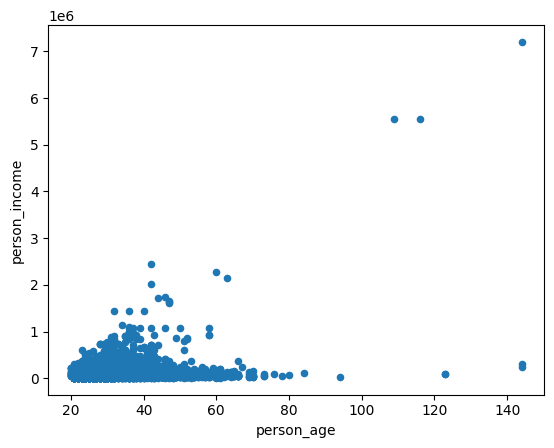

In [13]:
data.plot(kind='scatter', x='person_age', y='person_income')
pass

In [14]:
data['person_age'].quantile([0.01, .05, .1, .5, .9, .99, .995])

,person_age
0.010,21.0
0.050,22.0
0.100,22.0
0.500,26.0
0.900,35.0
0.990,48.0
0.995,53.0


In [15]:
data['person_income'].quantile([0.01, .05, .1, .5, .9, .99, .995])

,person_income
0.010,17875.950
0.050,28366.700
0.100,35118.900
0.500,67048.000
0.900,133276.100
0.990,271450.060
0.995,360803.035


Можно заметить, что есть малое количество слишком больших значений параметров `person_age` и `person_income`, такие значения будем считать выбросами и удалим строки с такими значениями.

In [16]:
rows_to_drop = data[(data['person_age'] > data['person_age'].quantile(0.995)) |
                    (data['person_income'] > data['person_income'].quantile(0.995))]
data = data.drop(rows_to_drop.index)
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44579.000000,44579.00000,44579.000000,44579.000000,44579.000000,44579.000000,44579.000000,44579.000000,44579.000000
mean,27.572467,77210.74470,5.220081,9544.614998,11.003565,0.140258,5.766863,632.339734,0.222661
std,5.476834,44326.85548,5.492240,6270.635336,2.978639,0.087045,3.674604,50.300565,0.416037
min,20.000000,8000.00000,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,47048.00000,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,66965.00000,4.000000,8000.000000,11.010000,0.120000,4.000000,639.000000,0.000000
75%,30.000000,94781.50000,8.000000,12023.500000,12.990000,0.190000,8.000000,669.000000,0.000000
max,53.000000,360803.00000,34.000000,35000.000000,20.000000,0.660000,30.000000,768.000000,1.000000


## Визуализация данных

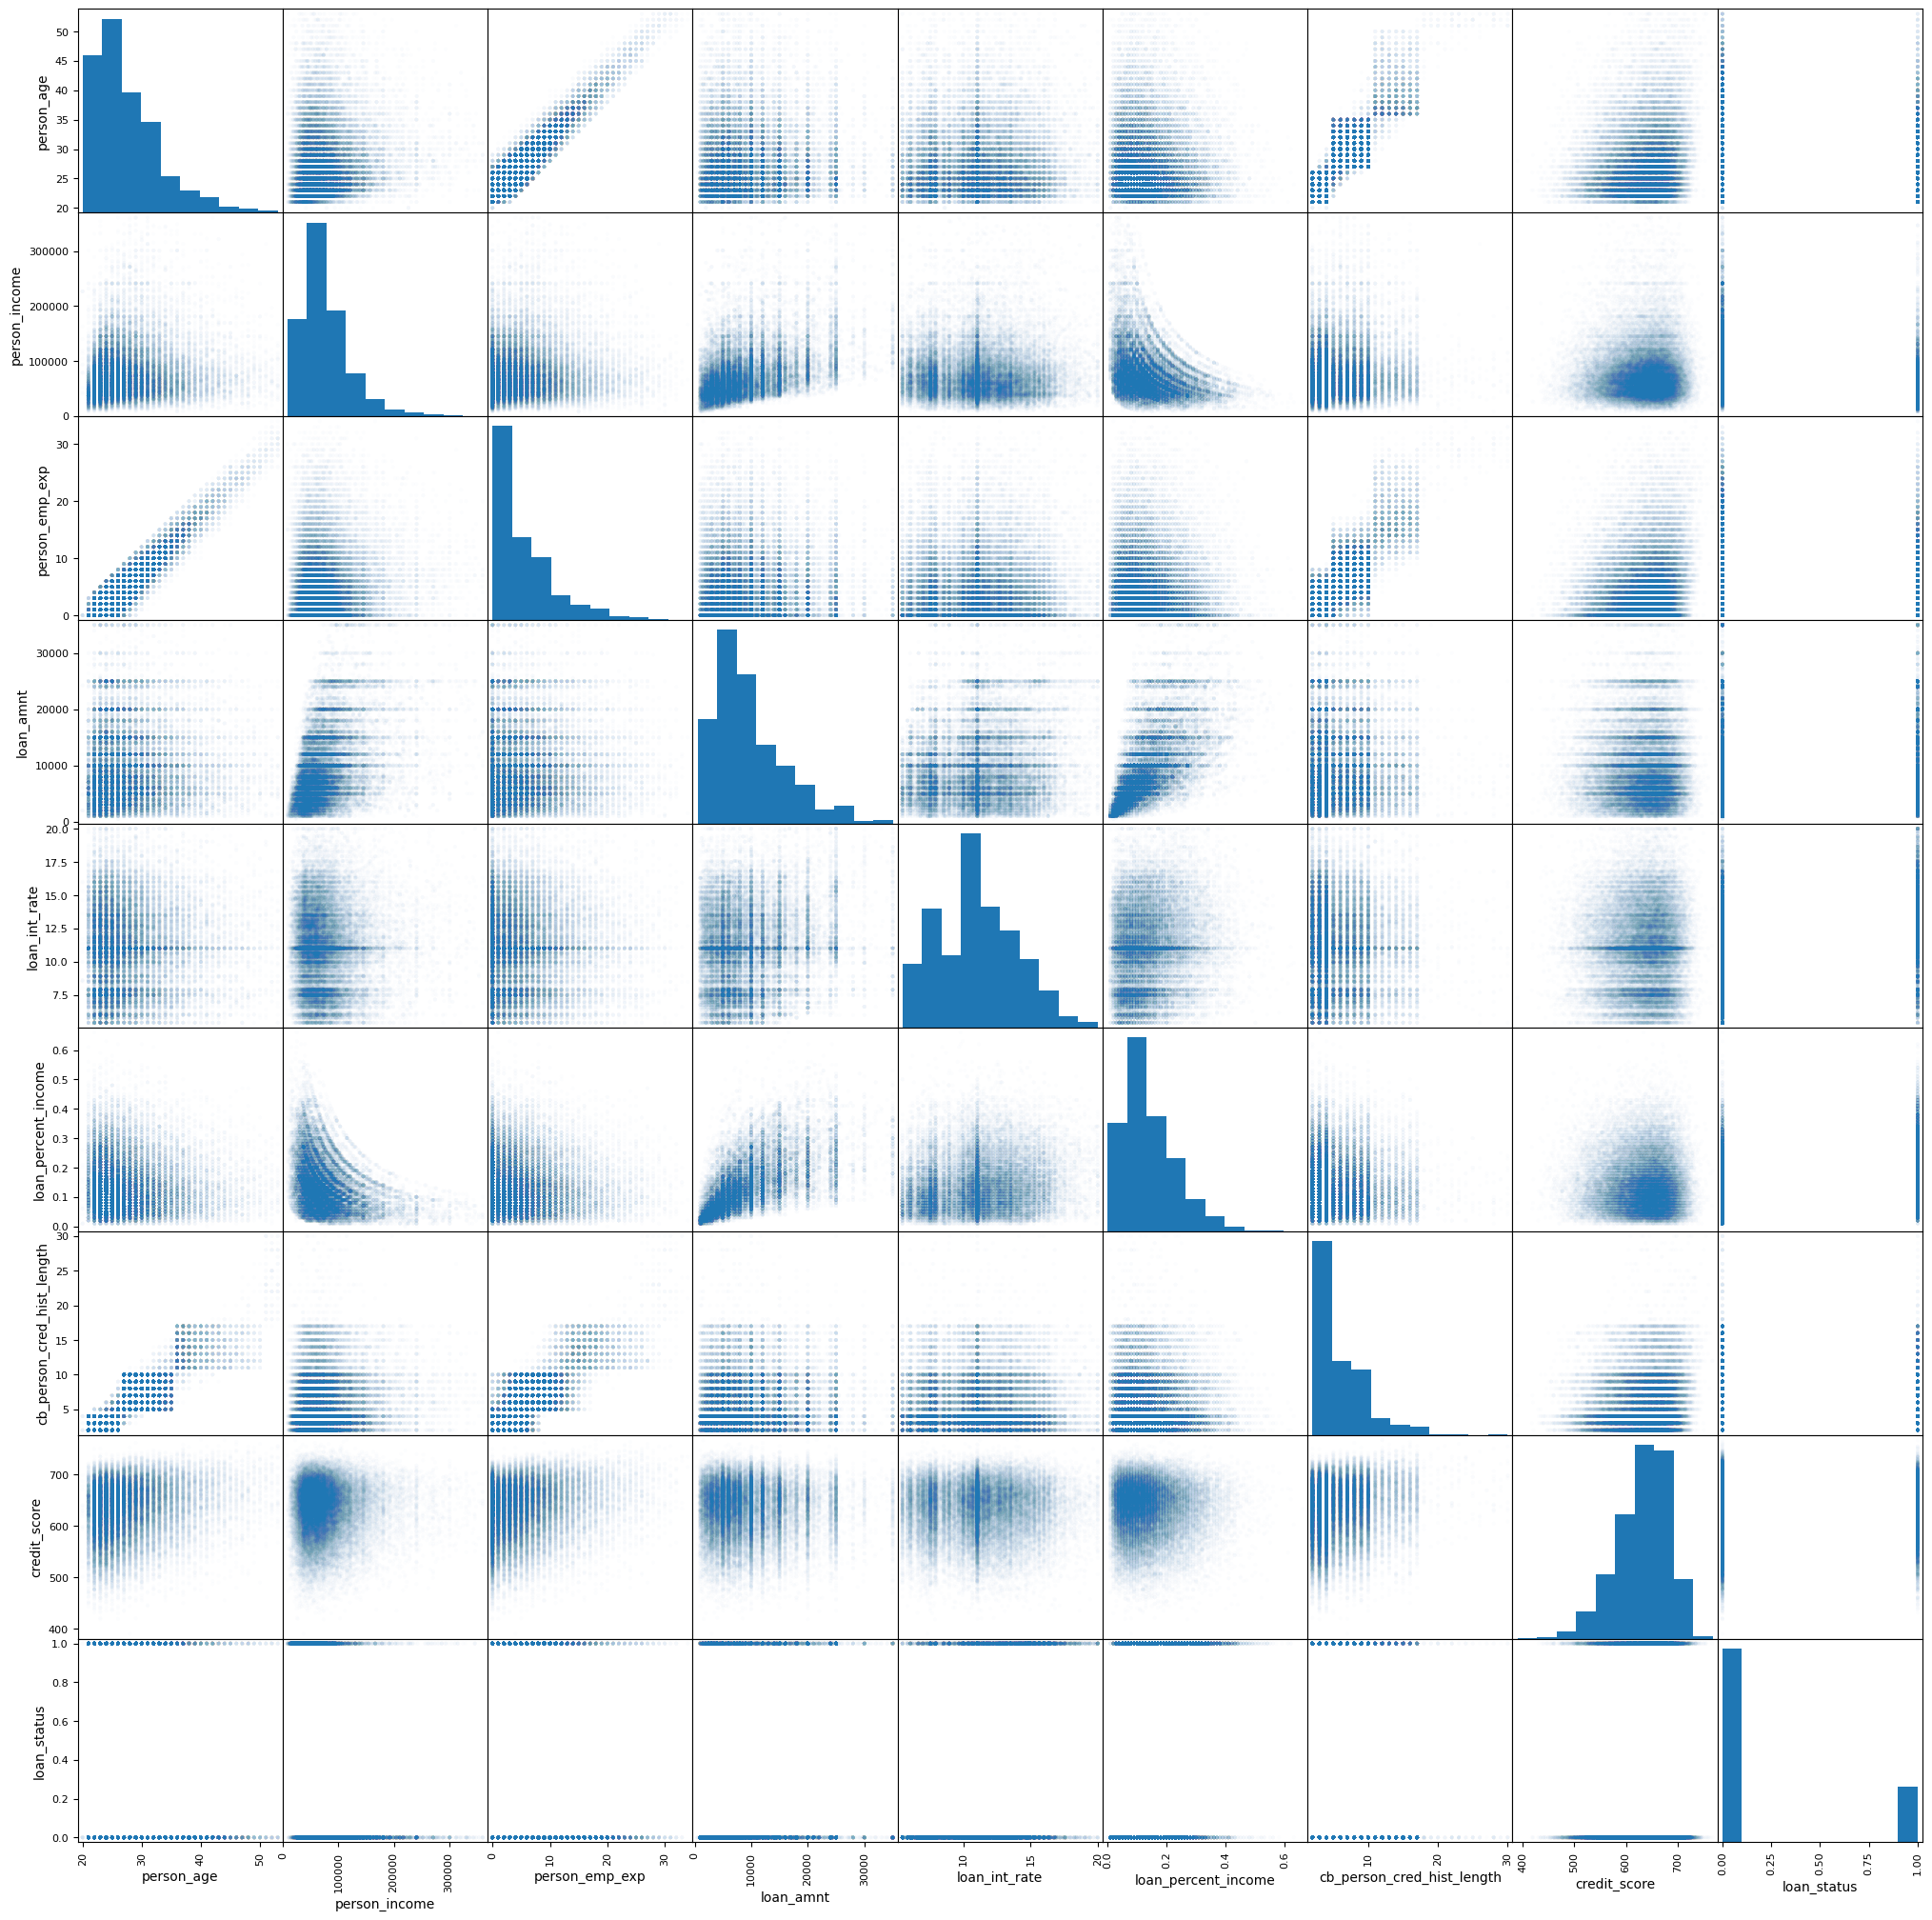

In [20]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (25, 25))
pass

**Более четко покажем графики зависимости годового дохода от возраста и резлуьтат одобрения кредитита от годового дохода**

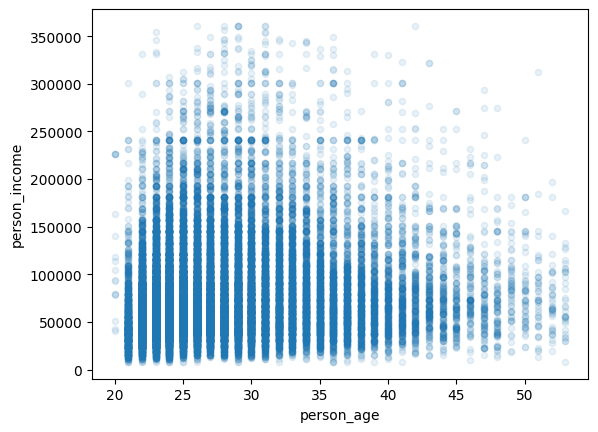

In [21]:
data.plot(kind='scatter', x='person_age', y = 'person_income', alpha=0.1)
pass

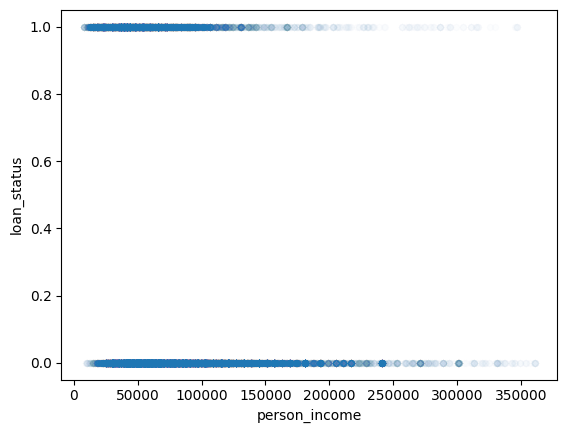

In [22]:
data.plot(kind='scatter', x='person_income', y = 'loan_status', alpha=0.01)
pass

**Также рассмотрим зависимосить одобрение кредита от кредитного рейтинга**

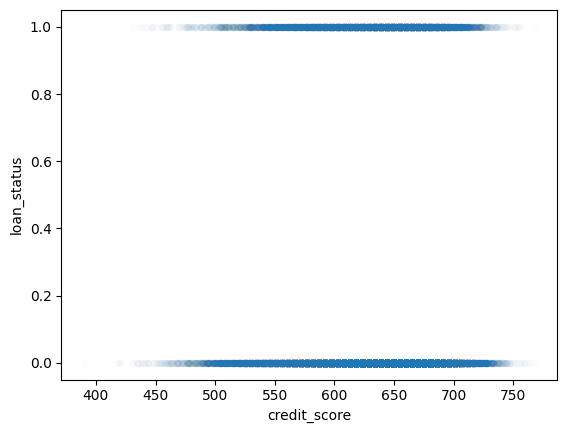

In [23]:
data.plot(kind='scatter', x='credit_score', y='loan_status', alpha=0.01)
pass

**Отобразим "ящик с усами" для процента от годово дохода и для кредитного рейтинга**

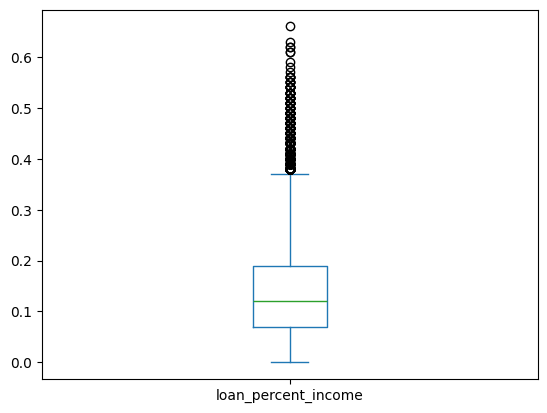

In [24]:
data['loan_percent_income'].plot(kind='box')
pass

По графику видно, что в основном кредит хотят берать от 10% до 20% годового дохода. А также есть не очень большое количество кредитов, которые хотят взять от 40% до 60% годвоого дохода.

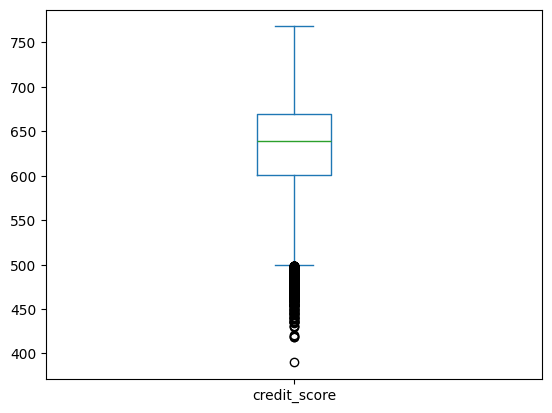

In [25]:
data['credit_score'].plot(kind='box')
pass

По этом графику можно сказать, что у людей, которые хотят взять кредит, в основном кредитный рейтинг находится в диапазоне от 600 до 675, но также есть небольшое количество людей с рейтингом от 400 до 500.

**Псотроим матрицу корелляций**

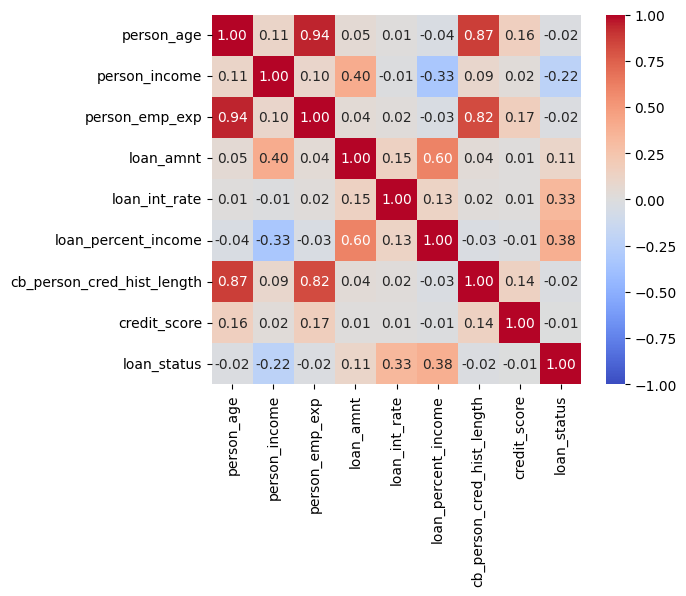

In [26]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f',  vmin=-1, vmax=1, cmap='coolwarm')
pass

По данной матрице видно, что на одобрение кредита больше всего влияет: процент кредита от годового дохода, процентная ставка и сумма кредита

## Разбиение на обучающую и тестовую выборку

In [27]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test, d = X_test.shape

N_train, N_test, d

(33434, 11145, 13)

## Нормализация данных

**Бинаризация номинальных признаков**

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [30]:
dumles = pd.DataFrame(enc.transform(
                      X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]),
                      columns=enc.get_feature_names_out(), index=X_train.index)
dumles.head()

,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
4794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8718,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20925,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
39030,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train = pd.concat((X_train, dumles), axis=1).drop(
    ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], axis=1)

In [32]:
X_train.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Associate,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
4794,21.0,40299.0,0,5000.0,12.84,0.12,2.0,611,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8718,26.0,73103.0,3,8000.0,16.77,0.11,2.0,552,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20925,29.0,54311.0,8,5000.0,11.01,0.09,7.0,584,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
39030,26.0,92599.0,2,10000.0,10.71,0.11,3.0,698,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21778,29.0,73316.0,11,6000.0,15.96,0.08,7.0,590,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Стандартизация количественных признаков**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [34]:
X_train.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Associate,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
count,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,...,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04
mean,2.118834e-16,6.843176e-17,6.056849e-17,1.416984e-16,4.187726e-16,-1.496148e-16,-6.072788e-17,-1.033277e-15,1.912689e-17,-5.631807e-18,...,9.563445e-18,-4.250420e-18,7.278844e-17,4.112281e-17,4.845479e-17,4.824227e-17,-4.016647e-17,-7.650756e-18,-7.225714e-17,-1.221996e-18
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.389902e+00,-1.556765e+00,-9.551585e-01,-1.446762e+00,-1.873601e+00,-1.612856e+00,-1.028073e+00,-4.248695e+00,-1.103426e+00,-6.028044e-01,...,-4.958451e-02,-2.651396e-01,-1.046733e+00,-4.350052e-01,-5.067303e-01,-3.442285e-01,-4.856178e-01,-4.464750e-01,-4.583247e-01,-1.017440e+00
25%,-6.547427e-01,-6.799280e-01,-7.720463e-01,-7.260809e-01,-8.104846e-01,-8.082037e-01,-7.548667e-01,-6.184242e-01,-1.103426e+00,-6.028044e-01,...,-4.958451e-02,-2.651396e-01,-1.046733e+00,-4.350052e-01,-5.067303e-01,-3.442285e-01,-4.856178e-01,-4.464750e-01,-4.583247e-01,-1.017440e+00
50%,-2.871629e-01,-2.313555e-01,-2.227097e-01,-2.456267e-01,1.105588e-03,-2.334522e-01,-4.816608e-01,1.354025e-01,9.062679e-01,-6.028044e-01,...,-4.958451e-02,-2.651396e-01,9.553535e-01,-4.350052e-01,-5.067303e-01,-3.442285e-01,-4.856178e-01,-4.464750e-01,-4.583247e-01,9.828591e-01
75%,4.479969e-01,3.934490e-01,5.097392e-01,3.949788e-01,6.718413e-01,5.711999e-01,6.111628e-01,7.305288e-01,9.062679e-01,1.658913e+00,...,-4.958451e-02,-2.651396e-01,9.553535e-01,-4.350052e-01,-5.067303e-01,-3.442285e-01,-4.856178e-01,-4.464750e-01,-4.583247e-01,9.828591e-01
max,4.675166e+00,6.375257e+00,5.270656e+00,4.078461e+00,3.016062e+00,5.973864e+00,6.621693e+00,2.694446e+00,9.062679e-01,1.658913e+00,...,2.016759e+01,3.771598e+00,9.553535e-01,2.298823e+00,1.973437e+00,2.905047e+00,2.059233e+00,2.239767e+00,2.181859e+00,9.828591e-01


**Выполняем все шаги нормализации для тестовой выборки**

In [35]:
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

dumles = pd.DataFrame(enc.transform(
                      X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]),
                      columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dumles), axis=1).drop(
    ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], axis=1)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


## Алгоритм kNN

**Запустим алгоритм k ближайших соседей с k=10**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test != y_test_predict)

In [38]:
print(err_train, err_test)

0.08742597355984925 0.10991475998205473


**Теперь подберем k, чтобы получить более точный результат**

In [41]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 10, 15, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10492347610589581 15


In [42]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09035712149309087 0.10892777030058322


**Вывод**

При использовании алгоритма `kNN` получилось добиться минимальной ошибки, равной `10,89%` при `k=15`

## Вывод

В ходе этой работы были получены базовые навыки в области машинного обучения и анализа данных.

Были выполнены следующие задачи:
* Словесное описание поставленной задачи
* Анализ данных с помощью численных значений и графиков
* Нахождение выбросов в задаче
* Подготовка данных для использования методов машинного обучения
* Использование алгоритма `kNN` для решения задачи